
0: 800x800 96 circles, 7.7ms
Speed: 2.6ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


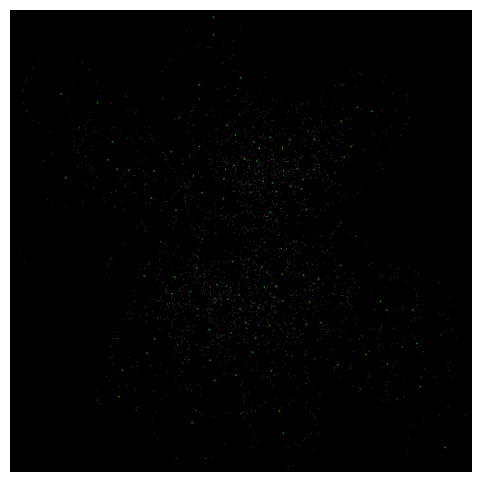

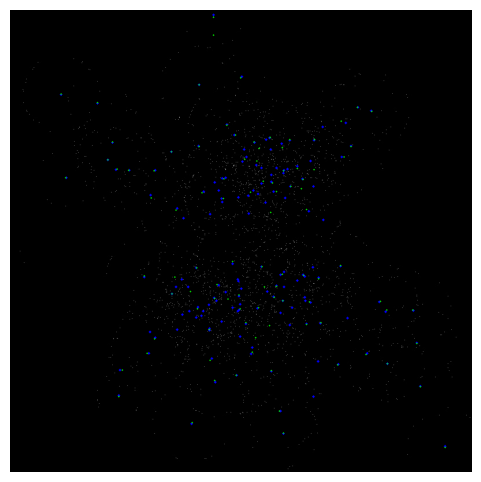

([0.3129251700680272, 0.5034013605442177, 0.5578231292517006],
 [0.4791666666666667, 0.7708333333333334, 0.8541666666666666],
 [0.37860082304526754, 0.6090534979423868, 0.6748971193415637])

In [25]:
import sys

sys.path.append(r'/user/gr1/delphi/dghezzi/KeyPoint_Detection')

import KP as kpl
import numpy as np
from torch import Tensor

image_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/Prova800.jpg'
txt_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/Prova800.txt'
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/training_output2/weights/last.pt'

results = kpl.inference(image_path, model_path, confidence=0.4, show_image=True, save_image=False)
kpl.show_with_MCpoints(results, image_path, txt_path, show_image=True, save_image=False, img_size=(800, 800))

pred_points = [(float(x), float(y)) for r in results if r.keypoints is not None for kp in r.keypoints.xy for x,y in kp]
gt_points   = np.loadtxt(txt_path, usecols=(-3, -2)) * (800, 800)

pred_points = np.array(pred_points, dtype=float)
gt_points   = np.array(gt_points, dtype=float)

kpl.compute_pck_metrics(pred_points, gt_points, thresholds=[2,4,6])

# Pesi delle loss
box: 3.0
cls: 0.5
dfl: 0.6
pose: 20.0
kobj: 4.0

==> last.pt @4px: p=0.503, r=0.771, f1=0.609 (confidence=0.4)